In [2]:
%pylab inline
import math
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab as plb
from scipy.interpolate import interp1d
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Trial to read a file
#######################

#import pandas as pd
X = pd.read_csv(r'D:\data-file\SP2-15-SI-33468D-mapping.txt', sep="\t", header=None)
#choose the file and put its location in your pc
#convert the file into csv and read it

wleng = []#wave length array
data = []#intensity array
for i in range (2, 1022):#950
    wleng.append(X[i][0])
#fill the information of the first row into an array of wave lengths



#print(X.shape)
#for r in range(1, 1681):    
for j in range (2, 1022):
    data.append(X[j][685])
    #n = data.index(max(data))
    
#choose what row you want to plot    
    
x = X[0][1680]
y = X[1][1680]#coordinates of the row


Intensity distribution on point (10.5, 10.0)


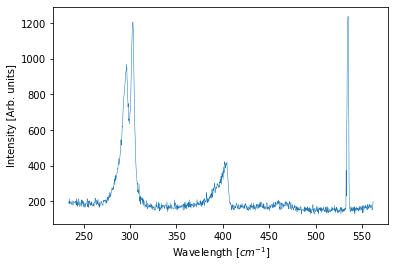

In [4]:
print('Intensity distribution on point',(x,y))
plt.plot(wleng, data, linewidth=0.5)
plt.xlabel('Wavelength [$cm^{-1}$]')
plt.ylabel('Intensity [Arb. units]')
plt.show()#plot the graph and label the axis

In [5]:
def FindPeak1(data):
    while(wleng[data.index(max(data))] > 370):#wavelength upper limit of first peak
        #check if there is a strong background radiation
        s = data.index(max(data))
        for o in range (0, 40):
            data[s-o] = min(data)#deleting or minimising the intensity
            c = s + o
            if ((s+o) >= 1681):
                c = 1681
            data[c] = min(data)
    m = max(data)
    maxposition = data.index(m)
    return [wleng[maxposition], data[maxposition]]#return the position and the value of the peak

In [19]:
FindPeak1(data)

[300.74301, 1030.0]

In [6]:
def FindPeak2(data):
    #y = 100
    ii = data.index(max(data))
    
    #while (y > 50):
     #   ii += 5
      #  y = data[ii] - min(data)
    ii += 20#take an index where the first peak ends by using the previous function
    #the 20 could be increased if the function was wider
    jj = ii
    dataa = []
    wleng2 = []
    maxx = max(data)
    minn = min(data)
    for k in range (jj, 1020):
        #if (data[k] > maxx/2.):
          #  data[K] = minn
        dataa.append(data[k])
        wleng2.append(wleng[k])#cut the array of wavelength and fill it in another new array
    minn = min(data)
    while(wleng2[dataa.index(max(dataa))] > 450):#wavelength upper limit of second peak
        #Check if there is a background signal having intensity bigger than the second peak
        s = dataa.index(max(dataa))
        for o in range (0, 40):
            dataa[s-o] = minn#erase the data of thesignal
            c = s + o
            if (c >= len(dataa)):
                c = len(dataa) - 1
            dataa[c] = minn#find the maximum of the new array
    maxposition2 = dataa.index(max(dataa))#Find its index
    return [wleng2[maxposition2], dataa[maxposition2], ii + maxposition2]
#return the second peak wavelength and intensity and its index in the old array which we will need after

In [6]:
FindPeak2(data)

KeyboardInterrupt: 

In [7]:
def FindHalfWidth1(data):
    yth = FindPeak1(data)[1]#take the peak as the first step
    y = yth
    z = yth
    yhp = (yth - min(data))/2 + min(data)
    i = data.index(max(data))
    j = data.index(max(data))
    while (y > yhp):
    #use a for loop to check when the intensity value just drops below the half width intensity and record the number of steps
        i += 1
        y = data[i]
        
    for ii in range(1, 35):#if there was fluctuation the previous for may not have took the whole information
        #So as much the peak is wider with more fluctuation 35 could be increased 
        if (data[i + ii] > yhp):
            i = i + ii
            
    xhp = wleng[i]
    while (z > yhp):#the same thing done from the left side
        j -= 1
        z = data[j]
        
    for jj in range(1, 35):#
        if (data[j - jj] > yhp):
            j = j - jj
            
    xhp1 = wleng[j]
    return [abs(xhp1 - xhp), xhp1, xhp, j, i]#return the FHW and the walength of the points at this intensity and their indeces

In [ ]:
FindHalfWidth1(data)

In [8]:
def FindHalfWidth2(data):#same technique is used here
    yth = FindPeak2(data)[1]
    y = yth
    z = yth
    yhp = (yth - min(data))/2 + min(data)
    i = FindPeak2(data)[2]
    j = FindPeak2(data)[2]
    while (y > yhp):
        i += 1
        #print(i)
        y = data[i]
    
    for ii in range(1, 35):
        if (data[i + ii] > yhp):
            i = i + ii
            
    xhp = wleng[i]
    
    while (z > yhp):
        j -= 1
        z = data[j]
        
    for jj in range(1, 35):
        if (data[j - jj] > yhp):
            j = j - jj
            
    xhp1 = wleng[j]
    
    return [abs(xhp1 - xhp), xhp1, xhp, j, i]

In [25]:
FindHalfWidth2(data)

[13.202920000000006, 391.60519, 404.80811, 481, 522]

In [9]:
x1 = FindPeak1(data)
xth = x1[0]
x2 = FindPeak2(data)
xth2 = x2[0]
x3 = FindHalfWidth1(data)
xhp = x3[1]
xhp1 = x3[2]
x4 = FindHalfWidth2(data)
xhp2 = x4[1]
xhp3 = x4[2]

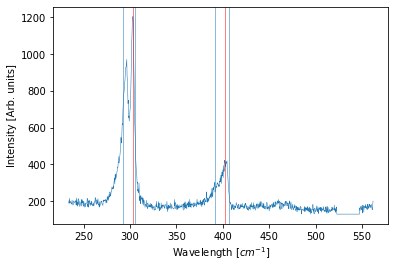

In [10]:
plt.plot(wleng, data, linewidth=0.5)
plt.xlabel('Wavelength [$cm^{-1}$]')
plt.ylabel('Intensity [Arb. units]')
plt.axvline(x=xth, color='r', linewidth=0.5, linestyle='-')
plt.axvline(x=xth2, color='r', linewidth=0.5, linestyle='-')
plt.axvline(x=xhp, linewidth=0.5, linestyle='-')
plt.axvline(x=xhp1, linewidth=0.5, linestyle='-')
plt.axvline(x=xhp3, linewidth=0.5, linestyle='-')
plt.axvline(x=xhp2, linewidth=0.5, linestyle='-')
plt.show()#plot the results

In [11]:
def Yeild1(data, wleng):
    intg = 0
    intgg = 0
    x3 = FindHalfWidth1(data)
    xhp = x3[1]
    xhp1 = x3[2]
    i = FindHalfWidth1(data)[4]
    j = FindHalfWidth1(data)[3]#interval of the integration
    for k in range (j+1, i):
        df = wleng[k] - wleng[k - 1]#integrate discretely the function between the FHW boundaries and the minimum and the curve
        intg += df * data[k]#right rectangular integration which may add some extra area
    for kk in range (j, i-1):# left rectangular integration which may remove some of the actual area
        dff = wleng[kk + 1] - wleng[kk]
        intgg += dff * data[kk]
    a1 = intg - min(data) * abs(xhp1 - xhp)
    a2 = intgg - min(data) * abs(xhp1 - xhp)
    return (a1 + a2)/2 #integrate in two ways and then find the average of the yield of both integrations

In [20]:
Yeild1(data, wleng)

9190.121334999982

In [12]:
def Yeild2(data, wleng):#same as to find the first yield
    intg = 0
    intgg = 0
    x4 = FindHalfWidth2(data)
    xhp2 = x4[1]
    xhp3 = x4[2]
    i = FindHalfWidth2(data)[4]
    j = FindHalfWidth2(data)[3]
    for k in range (j+1, i):
        df = wleng[k] - wleng[k - 1]
        intg += df * data[k]
    for kk in range (j, i-1):
        dff = wleng[kk + 1] - wleng[kk]
        intgg += dff * data[kk]
    a1 = intg - min(data) * abs(xhp3 - xhp2)
    a2 = intgg - min(data) * abs(xhp3 - xhp2)
    return (a1 + a2)/2

In [19]:
Yeild2(data, wleng)

2991.170065

In [13]:
X = pd.read_csv(r'D:\data-file\SP2-15-SI-33468D-mapping.txt', sep="\t", header=None)#reread the table into a matrix
wleng = []
data = []
Z1 = []
Z2 = []
#peak1 = []
#peak2 = []
#yeild1 = []
#yeild2 = []
#ratio = []
for i in range (2, 1022):#950
    #fill the wavelength data
    wleng.append(X[i][0])
#print(X.shape)

for r in range(1, 1681):    
    for j in range (2, 1022):
        data.append(X[j][r])#fill the intensity data at each point of same x coordinate then change it
    
    
    #print(r)
    #Z1.append(FindPeak1(data)[0])
    #Z1.append(FindPeak2(data)[0]) 
    #Z1.append(Yeild1(data, wleng))
    #if (r != 685):
     #   Z1.append(Yeild2(data, wleng))
    #else:
     #   Z1.append(2991.170065)
        
        #choose any function to plot
        
    if (r != 685):#Althoagh the function of finding the strong background and erasing it worked on descrete points
        #when it was run in the loop something happen which didn't stope this loop at 685
        #simply the value of this row finded outside the loop was appended to the array 
        Z1.append(Yeild1(data, wleng) / Yeild2(data, wleng))
    else:
        Z1.append(Yeild1(data, wleng) / 2991.170065)
        
        
        
    #Z1.append(Yeild1(data, wleng) / Yeild2(data, wleng))
    #print(r)
    data.clear()#clear the data to reset the process
#print(Z1)
    #n = data.index(max(data))

In [14]:
def ArrToMat(Arr):
    Mat = np.zeros((40,40))
    r = 0
    for i in range(0, 40):
        for j in range(0, 40):
            Mat[i][j] = Arr[r]
            r += 1
     
    return Mat#convert the array we got into a matrix as the coordinates are distributed on the first two columns

In [15]:
Mat = ArrToMat(Z1)

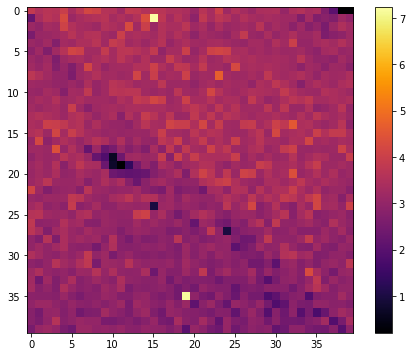

In [16]:
fig = plt.figure(figsize=(8,6))
plt.imshow(Mat,cmap="inferno")
#plt.title("Plot 2D array")
#plt.clim(1, 6)
plt.colorbar()
plt.draw()#plot the matrix of the ratio of yields on each cell and represent the value of each cell by a color 